# Ejercicio n° 1 y 2 del proyecto
Proceso a seguir:
* Carga de la imagen y su respectiva conversión a formato en escala de grises.
* Suavizacion de la imagen con filtro Gaussiano.
* Detección de las monedas bajo la premisa de que estos presentan forma circular con cv.HoughCircles
* Con los centros y radios calculados en el paso anterior, separar la region interna a los circulos.
* Realizar el conteo de circulos.


In [458]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

In [459]:
def show_image(img,color="gray"):
    plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB),cmap=color)
    plt.axis("off")
    plt.show()

In [460]:
moneda=cv.imread("monedas.jpg")

In [461]:
gray=cv.cvtColor(moneda,cv.COLOR_BGR2GRAY)

In [462]:
blur_coin=cv.GaussianBlur(gray,(15,15),5)

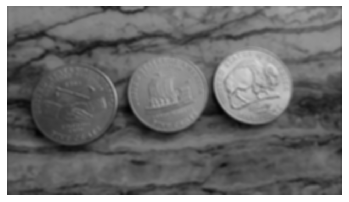

In [463]:
show_image(blur_coin)

In [465]:
#Método HoughCircles que detecta los circulos dentro de la imagen
circles=cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,300,param1=100,param2=30,minRadius=0,maxRadius=200)

In [466]:
circles=np.uint32(np.around(circles))

In [467]:
#Copia de la imagen original para visualizar los circulos detectados
moneda_c=moneda.copy()
#Inicialización de una variable de counting
cant_monedas=0
#(x,y): centro del circulo, r: radio del circulo
for x,y,r in circles[0,:]:
    #Dibujado del circulo en moneda_c
    cv.circle(moneda_c,(x,y),r,(0,0,255),6)
    cant_monedas+=1

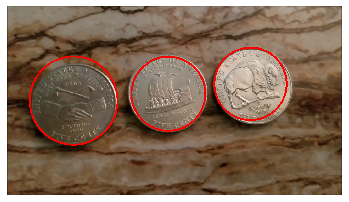

In [468]:
show_image(moneda_c)

Sabiendo el centro (xo,yo) y el radio r de una circunferencia, se sabe que un punto esta dentro de este si:
$$(x-x_{o})^{2}+(y-y_{o})^{2}\leq r^2.$$
Para cada circulo:
* Dentro se realiza un ciclo for en todos los puntos de la imagen, se calcula:
$$(x-x_{o})^{2}+(y-y_{o})^{2}.$$
* Se compara con el radio al cuadrado

In [469]:

h,l=gray.shape
mask=np.ones((h,l))
for xo,yo,r in circles[0,:]:
    for y in range(h):
        for x in range(l):
            camp_value=((x-xo)**2)+((y-yo)**2)
            if((camp_value<r**2)or(camp_value==r**2)):
                mask[y,x]=0

In [470]:
monedas_filtradas=moneda.copy()

In [471]:
monedas_filtradas[np.where(mask)]=(0,255,0)

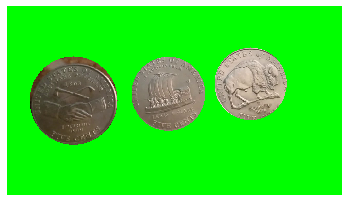

In [472]:
show_image(monedas_filtradas)

In [474]:
#Impresión de la cantidad de monedas
print("La cantidad de monedas es: "+str(cant_monedas))

La cantidad de monedas es: 3
